In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('Engg_College_Data.csv')

In [5]:
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


In [6]:
df.shape

(26, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SR_NO           26 non-null     int64 
 1   Engg_College    26 non-null     object
 2   Teaching        26 non-null     int64 
 3   Fees            26 non-null     int64 
 4   Placements      26 non-null     int64 
 5   Internship      26 non-null     int64 
 6   Infrastructure  26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [8]:
# Get the count of unique eng colleges

df.Engg_College.nunique()

26

In [9]:
# Get teh uniq college names

df.Engg_College.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [10]:
df.iloc[:,1:].describe().round(0)

,Teaching,Fees,Placements,Internship,Infrastructure
count,26.0,26.0,26.0,26.0,26.0
mean,3.0,4.0,3.0,3.0,3.0
std,1.0,1.0,2.0,1.0,1.0
min,1.0,1.0,1.0,1.0,1.0
25%,2.0,2.0,1.0,2.0,3.0
50%,3.0,4.0,3.0,2.0,3.0
75%,3.0,5.0,4.0,4.0,5.0
max,5.0,5.0,5.0,5.0,5.0


In [11]:
# Removing the SR_NO col and storing the result in new df

enggdata = df.iloc[:, 1:7]
enggdata.head()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,A,5,2,5,5,3
1,B,4,2,5,5,3
2,C,4,5,5,4,5
3,D,5,4,5,4,4
4,E,2,5,2,2,5


In [12]:
# Create the dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
# Choose avg linkage method

link_method = linkage(enggdata.iloc[:, 1:6], method='average')

In [14]:
labellist = list(enggdata.Engg_College)
labellist

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

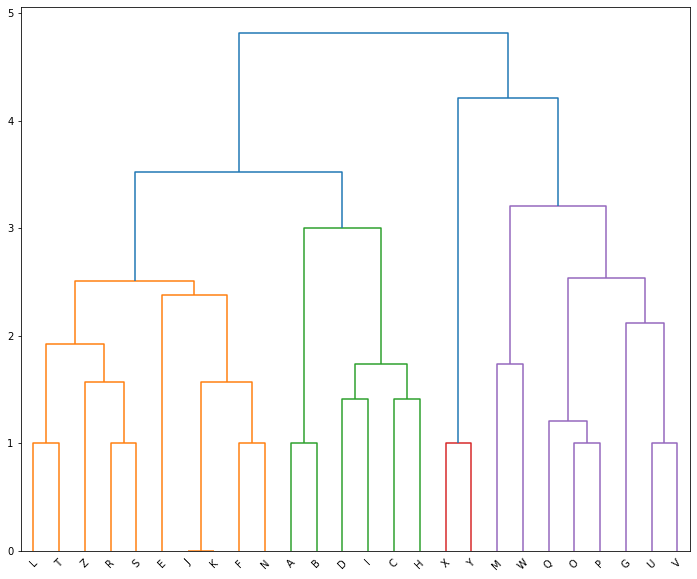

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 10))

dend = dendrogram(link_method, labels=labellist)

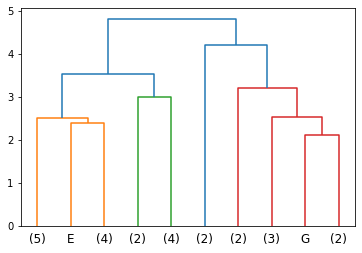

In [16]:
# Cutting dendrogram with suitable clusters

dend = dendrogram(link_method, truncate_mode='lastp', p=10, labels=labellist)

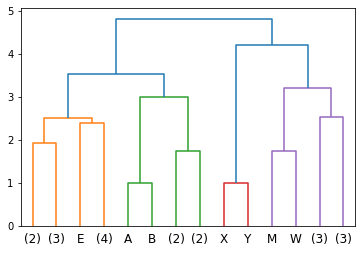

In [17]:
dend = dendrogram(link_method, truncate_mode='level', p=3, labels=labellist)

In [18]:
# Cluster labelling


from scipy.cluster.hierarchy import fcluster

clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3,
       3, 2, 2, 1], dtype=int32)

In [19]:
df['clusters'] = clusters
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,clusters
0,1,A,5,2,5,5,3,1
1,2,B,4,2,5,5,3,1
2,3,C,4,5,5,4,5,1
3,4,D,5,4,5,4,4,1
4,5,E,2,5,2,2,5,1


In [20]:
# Cluster profiling

# Cluster Frequency

df['clusters'].value_counts().sort_index()

1    16
2     2
3     8
Name: clusters, dtype: int64

In [21]:
aggdata = df.iloc[:,1:8].groupby('clusters').mean()
aggdata

,Teaching,Fees,Placements,Internship,Infrastructure
clusters,,,,,
1,3.375,4.125,3.875,3.4375,3.875
2,1.000,1.000,1.000,1.5000,5.000
3,2.125,3.125,1.375,1.7500,2.000


In [22]:
# Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

In [23]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster_agglo = cluster.fit_predict(enggdata.iloc[:, 1:6])
cluster_agglo

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 2, 2, 0], dtype=int64)

In [24]:
df['Agglo_Clusters'] = cluster_agglo

In [25]:
df.columns

Index(['SR_NO', 'Engg_College', 'Teaching', 'Fees', 'Placements', 'Internship',
       'Infrastructure', 'clusters', 'Agglo_Clusters'],
      dtype='object')

In [26]:
df

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,clusters,Agglo_Clusters
0,1,A,5,2,5,5,3,1,0
1,2,B,4,2,5,5,3,1,0
2,3,C,4,5,5,4,5,1,0
3,4,D,5,4,5,4,4,1,0
4,5,E,2,5,2,2,5,1,0
5,6,F,3,4,3,3,4,1,0
6,7,G,1,3,1,1,2,3,1
7,8,H,4,4,5,5,5,1,0
8,9,I,4,4,4,4,4,1,0
9,10,J,3,4,3,4,5,1,0


# K Means Clustering

In [27]:
from sklearn.cluster import KMeans
import seaborn as sns


In [28]:
df = pd.read_csv('bank.csv')

In [29]:
df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [30]:
df.shape

(515, 6)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


In [32]:
df.iloc[:, 1:].describe().round(0)

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.0,515.0,515.0,515.0,515.0
mean,232.0,151.0,82.0,2935.0,599.0
std,67.0,57.0,29.0,437.0,83.0
min,120.0,10.0,33.0,1200.0,380.0
25%,170.0,103.0,58.0,2675.0,538.0
50%,237.0,152.0,80.0,2960.0,601.0
75%,291.0,200.0,105.0,3300.0,658.0
max,350.0,247.0,212.0,3650.0,838.0


In [33]:
# Check for duplicates

df.duplicated().sum()

0

In [34]:
# Scale data

from sklearn.preprocessing import StandardScaler

In [35]:
# Create StandardScaler Object
x = StandardScaler()

In [36]:
# Scale

scaleddata = x.fit_transform(df.iloc[:, 1:6])
sdf = pd.DataFrame(scaleddata, columns=df.columns[1:])
sdf

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.026024,-1.087101,0.484326
1,-1.640819,-1.138113,-0.584105,1.317635,-1.949528
2,1.107586,-0.029788,-0.199074,-0.835176,0.844009
3,0.281562,-0.680709,1.656075,1.638267,0.292496
4,-0.874870,-0.276082,1.621072,1.065711,-0.235039
...,...,...,...,...,...
510,1.573163,-0.188120,1.026024,-0.674860,1.143745
511,-0.964982,-0.346452,-0.759119,-0.674860,-0.894458
512,1.513088,-1.138113,0.921016,-0.193913,0.927935
513,-0.604535,0.445209,-1.669192,-0.400033,-1.122257


In [37]:
# Scaled data will get the mean as 0 and standard deviation as 1

sdf.describe().round(2)

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.00,515.00,515.00,515.00,515.00
mean,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.69,-2.48,-1.70,-3.97,-2.62
25%,-0.94,-0.84,-0.83,-0.59,-0.73
50%,0.07,0.02,-0.06,0.06,0.03
75%,0.88,0.87,0.82,0.84,0.71
max,1.77,1.69,4.56,1.64,2.87


In [38]:
# Create clusters using KMeans

# Forming 2 clusters with K=2

In [39]:
# Create K Means cluster and store the result

# random_state defines the initial random centroid position

k_means = KMeans(n_clusters=2, random_state=1)
k_means

KMeans(n_clusters=2, random_state=1)

In [40]:
# Fit K means on the scaled df

k_means.fit(sdf)

KMeans(n_clusters=2, random_state=1)

In [41]:
# Get the labels
k_means.labels_[:10]

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

In [42]:
# Within Sum of Squares

k_means.inertia_ # WSS

1943.3740862056484

In [43]:
# Find the ideal value of K

wss =[]

for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(sdf)
    wss.append(km.inertia_)
    
wss

[2574.9999999999964,
 1943.3740862056484,
 1593.9708577192202,
 1375.4932875022535,
 1220.2742967592983,
 1115.743872395149,
 1024.2940640357654,
 945.0390781132705,
 886.3657321414203,
 832.7774003606155]

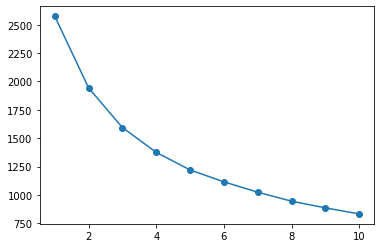

In [44]:
plt.plot(range(1, 11), wss, marker='o')

In [45]:
# It's not clear let's go with KMeans with K = 3

In [46]:
k_means = KMeans(n_clusters=3, random_state=1)
k_means.fit(sdf)
labels = k_means.labels_

In [47]:
# Evaluate the Cluster Quality

from sklearn.metrics import silhouette_samples, silhouette_score

In [48]:
# Silhouette score closer to 1 cluster quality is better

silhouette_score(sdf, labels)

0.218819843712231

In [49]:
# silhouette_sample --> for 'a' particular observation, how close it is to its cluster centroid
silhouette_samples(sdf, labels)[:10]

array([0.18585072, 0.27388886, 0.05963609, 0.20013532, 0.13098507,
       0.01439404, 0.27967759, 0.1166913 , 0.18469591, 0.18723267])

In [50]:
# Check for multiple k-values in loop

ss = []

for k in range(2, 11):
    sil_km = KMeans(n_clusters=k, random_state=1)
    sil_km.fit(sdf)
    labels= sil_km.labels_
    ss.append(silhouette_score(sdf, labels))
    

Text(0, 0.5, 'Silhouette Scores')

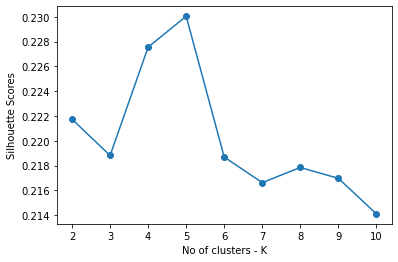

In [51]:
plt.plot(range(2,11), ss, marker='o')
plt.xlabel('No of clusters - K')
plt.ylabel('Silhouette Scores')

In [52]:
# Build k means model with 5 clusters

k_means = KMeans(n_clusters=5, random_state=1)
k_means.fit(sdf)
labels=k_means.labels_

df['cluskmeans5'] = labels

In [53]:
# Cluster Profiling

df.cluskmeans5.value_counts().sort_index()

0    132
1    104
2    106
3     88
4     85
Name: cluskmeans5, dtype: int64